In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense,Conv2D,Dense, Dropout, Flatten, Input
import os
import matplotlib.pyplot as plt
from keras import Sequential,layers
import cv2
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
from keras_preprocessing.image import ImageDataGenerator

In [75]:
## resize train image
if not os.path.exists(r'C:/Users/Admin/Downloads/resized_image'):
  os.makedirs(r'C:/Users/Admin/Downloads/resized_image')

base_width = 600  ## in pixel
for i in os.listdir(r'C:/Users/Admin/Downloads/aio-hutech/train'):
  file_path = r'C:/Users/Admin/Downloads/aio-hutech/train/'+ i
  for j in os.listdir(file_path):
    img_path = file_path + '/'+ j
    print(img_path)
    img = Image.open(img_path)
    wpercent = (base_width / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((base_width, hsize), Image.Resampling.LANCZOS)
    if not os.path.exists(r'C:/Users/Admin/Downloads/resized_image/'+i):
      os.makedirs(r'C:/Users/Admin/Downloads/resized_image/'+i)
    img.save(r'C:/Users/Admin/Downloads/resized_image/'+i+'/'+j)


C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN001.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN002.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN003.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN004.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN005.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN006.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN007.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN008.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN009.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN010.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN011.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN012.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN013.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN

In [78]:
## resize test image
if not os.path.exists(r'C:/Users/Admin/Downloads/test_resized_image'):
  os.makedirs(r'C:/Users/Admin/Downloads/test_resized_image')

base_width = 600  ## in pixel
for i in os.listdir(r'C:/Users/Admin/Downloads/aio-hutech/test'):
    img_path = r'C:/Users/Admin/Downloads/aio-hutech/test/'+ i
    print(img_path)
    img = Image.open(img_path)
    wpercent = (base_width / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((base_width, hsize), Image.Resampling.LANCZOS)
    img.save(r'C:/Users/Admin/Downloads/test_resized_image/'+i)


C:/Users/Admin/Downloads/aio-hutech/test/001.jpg
C:/Users/Admin/Downloads/aio-hutech/test/002.jpg
C:/Users/Admin/Downloads/aio-hutech/test/003.jpg
C:/Users/Admin/Downloads/aio-hutech/test/004.jpg
C:/Users/Admin/Downloads/aio-hutech/test/005.jpg
C:/Users/Admin/Downloads/aio-hutech/test/006.jpg
C:/Users/Admin/Downloads/aio-hutech/test/007.jpg
C:/Users/Admin/Downloads/aio-hutech/test/008.jpg
C:/Users/Admin/Downloads/aio-hutech/test/009.jpg
C:/Users/Admin/Downloads/aio-hutech/test/010.jpg
C:/Users/Admin/Downloads/aio-hutech/test/011.jpg
C:/Users/Admin/Downloads/aio-hutech/test/012.jpg
C:/Users/Admin/Downloads/aio-hutech/test/013.jpg
C:/Users/Admin/Downloads/aio-hutech/test/014.jpg
C:/Users/Admin/Downloads/aio-hutech/test/015.jpg
C:/Users/Admin/Downloads/aio-hutech/test/016.jpg
C:/Users/Admin/Downloads/aio-hutech/test/017.jpg
C:/Users/Admin/Downloads/aio-hutech/test/018.jpg
C:/Users/Admin/Downloads/aio-hutech/test/019.jpg
C:/Users/Admin/Downloads/aio-hutech/test/020.jpg
C:/Users/Admin/Downl

In [80]:
### rename train file
for i in os.listdir(r'C:/Users/Admin/Downloads/resized_image'):
    file_path = r'C:/Users/Admin/Downloads/resized_image/'+i
    print(file_path)
    if i == 'bào ngư xám + trắng':
        os.rename(file_path,r'C:/Users/Admin/Downloads/resized_image/1')
    elif i == 'Đùi gà Baby (cắt ngắn)':
        os.rename(file_path,r'C:/Users/Admin/Downloads/resized_image/2')
    elif i == 'linh chi trắng':
        os.rename(file_path,r'C:/Users/Admin/Downloads/resized_image/3')
    else:
        os.rename(file_path,r'C:/Users/Admin/Downloads/resized_image/0')

C:/Users/Admin/Downloads/resized_image/bào ngư xám + trắng
C:/Users/Admin/Downloads/resized_image/linh chi trắng
C:/Users/Admin/Downloads/resized_image/nấm mỡ
C:/Users/Admin/Downloads/resized_image/Đùi gà Baby (cắt ngắn)


In [101]:
training_set = pd.DataFrame(columns=['path','label'])

for i in os.listdir(r'C:/Users/Admin/Downloads/resized_image'):
    file_path = r'C:/Users/Admin/Downloads/resized_image/'+i
    for j in os.listdir(file_path):
        img_path = file_path + '/'+ j
        temp_df = pd.DataFrame({'path': [img_path],'label': [int(i)]})
        training_set=pd.concat([training_set, temp_df])

In [102]:
training_set = training_set.reset_index(drop = True)

In [7]:
## resize image
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/test_resized_image'):
  os.makedirs('/content/drive/MyDrive/Colab Notebooks/test_resized_image')

base_width = 600  ## in pixel
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/test'):
    img_path = '/content/drive/MyDrive/Colab Notebooks/test/'+ i
    print(img_path)
    img = Image.open(img_path)
    wpercent = (base_width / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((base_width, hsize), Image.Resampling.LANCZOS)
    img.save('/content/drive/MyDrive/Colab Notebooks/test_resized_image/'+i)


/content/drive/MyDrive/Colab Notebooks/test/176.jpg
/content/drive/MyDrive/Colab Notebooks/test/067.jpg
/content/drive/MyDrive/Colab Notebooks/test/040.jpg
/content/drive/MyDrive/Colab Notebooks/test/051.jpg
/content/drive/MyDrive/Colab Notebooks/test/031.jpg
/content/drive/MyDrive/Colab Notebooks/test/005.jpg
/content/drive/MyDrive/Colab Notebooks/test/042.jpg
/content/drive/MyDrive/Colab Notebooks/test/155.jpg
/content/drive/MyDrive/Colab Notebooks/test/064.jpg
/content/drive/MyDrive/Colab Notebooks/test/162.jpg
/content/drive/MyDrive/Colab Notebooks/test/009.jpg
/content/drive/MyDrive/Colab Notebooks/test/117.jpg
/content/drive/MyDrive/Colab Notebooks/test/097.jpg
/content/drive/MyDrive/Colab Notebooks/test/092.jpg
/content/drive/MyDrive/Colab Notebooks/test/085.jpg
/content/drive/MyDrive/Colab Notebooks/test/012.jpg
/content/drive/MyDrive/Colab Notebooks/test/113.jpg
/content/drive/MyDrive/Colab Notebooks/test/181.jpg
/content/drive/MyDrive/Colab Notebooks/test/126.jpg
/content/dri

In [5]:
testing_set = []
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/test_resized_image'):
    img_path = '/content/drive/MyDrive/Colab Notebooks/test_resized_image/'+ i
    print(img_path)
    img = cv2.imread(img_path)
    if img is not None:
      new_img = img / 255.0

/content/drive/MyDrive/Colab Notebooks/test_resized_image/176.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/040.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/067.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/031.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/051.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/042.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/005.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/155.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/162.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/064.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/009.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/117.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/097.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/092.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/085.jpg
/content/d

In [116]:
train_df, val_df = train_test_split(
    training_set,
    test_size=0.2,
    stratify=training_set['label'],  # keeps class balance
    random_state=42
)

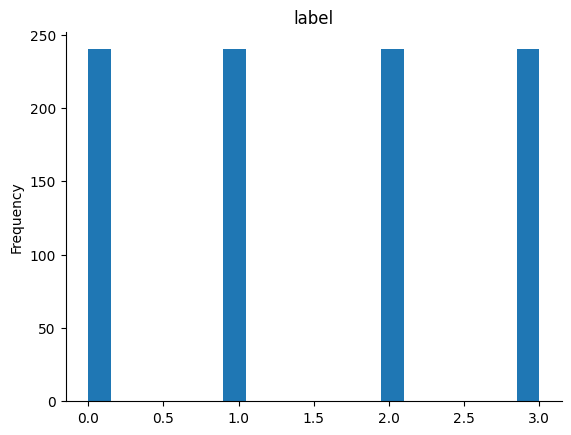

In [119]:
train_df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Basic ImageDataGenerator with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'  # or 'categorical' for multi-class
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

In [44]:
model = Sequential()
model.add(layers.Normalization())
model.add(layers.Conv2D(2,(2,2),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dense(4,activation = 'softmax'))
early_stopping = EarlyStopping(monitor='accuracy', patience=15, restore_best_weights=True)
model.compile(optimizer=keras.optimizers.Adam(.0001),loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor='accuracy', patience=15, restore_best_weights=True)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Convert the 'img' column to a NumPy array with the correct shape and dtype
X_train = np.array(train_data['img'])
X_val = np.array(val_data['img'])
y_train = np.array(train_data['label'])
y_val = np.array(val_data['label'])

TypeError: list indices must be integers or slices, not str

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
# Now, use the reshaped and formatted data for training
model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val),callbacks=[early_stopping])

ValueError: Invalid dtype: object